# CMIP6 AOPD/AOT comparison against ground-based and satellite remote sensing

- compare CMIP6 with MERRA2

#### Visualiztion of AOD for Svalbard area 5E, 72N - 27E, 83N

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import pandas as pd
from glob import glob

In [2]:
# set plotting style
plt.style.use('ggplot')
sns.set_context('paper')
sns.set(font = 'Serif', font_scale = 1.5, )
sns.set_style('darkgrid',
                  {'font.family':'serif', #'font.serif':'Helvetica'
                   'grid.linestyle': '--'           },
                   )

##### Choose a year you want to plot

In [3]:
#choseny = '2006'    # arctic haze year
#choseny = '1992'    # year after Pinatubo erruption
#### Russian Vulcano eruptions:
#choseny = '2002'     # Shiveluch 2001
choseny = '2010'     # Sarychev Peak 11-21 Jun 2009

In [4]:
hist_path = 'shared-cmip6-for-ns1000k/historical/'
model_path = ['AWI-CM-1-1-MR', 'CESM2','EC-Earth3','GFDL-ESM4','IPSL-CM6A-LR',
              'NESM3', 'BCC-CSM2-MR', 'CESM2-WACCM', 'EC-Earth3-Veg', 'GISS-E2-1-G',
              'MCM-UA-1-0', 'NorCPM1','BCC-ESM1','CNRM-CM6-1','FGOALS-f3-L','GISS-E2-1-G-CC',
              'MIROC6','NorESM2-LM','CAMS-CSM1-0','CNRM-ESM2-1','FGOALS-g3','GISS-E2-1-H',
              'MIROC-ES2L','SAM0-UNICON','CanESM5','E3SM-1-0','GFDL-CM4','HadGEM3-GC31-LL',
              'MRI-ESM2-0','UKESM1-0-LL']

merra_path = 'g4.areaAvgTimeSeries.M2IMNXGAS_5_12_4_AODANA.19800101-20141231.5E_72N_27E_83N.csv' 

#### Print all CMIP6 historical simulations including the AOD at 550nm (1850 - 2014)

In [5]:
for mp in range(len(model_path)):
    for _files in glob(hist_path + model_path[mp] + '/r*/od550aer_AERmon_*'):
        print(_files)

shared-cmip6-for-ns1000k/historical/CESM2/r1i1p1f1/od550aer_AERmon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc
shared-cmip6-for-ns1000k/historical/GFDL-ESM4/r1i1p1f1/od550aer_AERmon_GFDL-ESM4_historical_r1i1p1f1_gr1_195001-201412.nc
shared-cmip6-for-ns1000k/historical/GFDL-ESM4/r1i1p1f1/od550aer_AERmon_GFDL-ESM4_historical_r1i1p1f1_gr1_185001-194912.nc
shared-cmip6-for-ns1000k/historical/IPSL-CM6A-LR/r1i1p1f1/od550aer_AERmon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc
shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/od550aer_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc
shared-cmip6-for-ns1000k/historical/CNRM-CM6-1/r1i1p1f2/od550aer_AERmon_CNRM-CM6-1_historical_r1i1p1f2_gr_185001-201412.nc
shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/od550aer_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_194001-194912.nc
shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/od550aer_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_193001-193912.nc
shared-cmip6-for-ns100

#### Read all CMIP6 historical simulation including the AOD at 550nm (1980 - 2014)

In [6]:
cmip = dict()
for mp in range(len(model_path)):
    for files in glob(hist_path + model_path[mp] + '/r*/od550aer_AERmon_*201412.nc'):
#        print('until 2014: ', files)
#        print('text split: ', model_path[mp] + '_' +files.split('_')[4] + '_' + files.split('_')[6])
        _sel = model_path[mp] + '_' +files.split('_')[4] + '_' + files.split('_')[6]
        cmip[_sel] = xr.open_dataset(files, #decode_times  = True, 
                                     use_cftime = True)
    for files in glob(hist_path + model_path[mp] + '/r*/od550aer_AERmon_*198912.nc'):
#        print('until 1989: ', files)
#        print('text split: ', model_path[mp] + '_' +files.split('_')[4] + '_' + files.split('_')[6])  
        _sel = model_path[mp] + '_' +files.split('_')[4] + '_' + files.split('_')[6]
        cmip[_sel] = xr.open_dataset(files, #decode_times  = True, 
                                     use_cftime = True)
    for files in glob(hist_path + model_path[mp] + '/r*/od550aer_AERmon_*199912.nc'):
#        print('until 1999: ', files)
#        print('text split: ', model_path[mp] + '_' +files.split('_')[4] + '_' + files.split('_')[6])  
        _sel = model_path[mp] + '_' +files.split('_')[4] + '_' + files.split('_')[6]
        cmip[_sel] = xr.open_dataset(files, #decode_times  = True, 
                                     use_cftime = True)
    for files in glob(hist_path + model_path[mp] + '/r*/od550aer_AERmon_*200912.nc'):
#        print('until 2009: ', files)
#        print('text split: ', model_path[mp] + '_' +files.split('_')[4] + '_' + files.split('_')[6]) 
        _sel = model_path[mp] + '_' +files.split('_')[4] + '_' + files.split('_')[6]
        cmip[_sel] = xr.open_dataset(files, #decode_times  = True, 
                                     use_cftime = True)


/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'od550aer' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


#### Read MERRA2 data 

In [7]:
_merra = pd.read_csv(merra_path, header = 7, index_col = 'time', parse_dates=True, skipinitialspace=True)

##### Rename the MERRA2 column

In [8]:
_merra.rename(columns={'mean_M2IMNXGAS_5_12_4_AODANA':'MERRA2'}, inplace=True)
_merra

,MERRA2
time,
1980-01-01,0.152034
1980-02-01,0.138416
1980-03-01,0.153432
1980-04-01,0.144429
1980-05-01,0.116011
...,...
2014-08-01,0.113038
2014-09-01,0.093154
2014-10-01,0.085017


#### Add CMIP6 mean values for Svalbard area to the MERRA2 

In [9]:
merra = pd.DataFrame(_merra['MERRA2'][choseny + '-01-01': choseny + '-12-01'])#[choseny + '-01-01']#, choseny + '-12-01']

In [10]:
for k in cmip.keys():
    try: 
        print('years are included in: ', k)
        merra.insert(loc = 1, 
                 column = k.split('.')[0], 
                 value = cmip[k]['od550aer'].sel(time = slice(choseny + '-01', choseny + '-12'), 
                                            lat = slice(72, 83), 
                                            lon = slice(5, 27.5)).mean(axis=1).mean(axis=1))
    except:
        print('years are not included in: ', k)
#cmip[k].close()

years are included in:  CESM2_r1i1p1f1_185001-201412.nc
years are included in:  GFDL-ESM4_r1i1p1f1_195001-201412.nc
years are included in:  IPSL-CM6A-LR_r1i1p1f1_185001-201412.nc
years are included in:  CESM2-WACCM_r1i1p1f1_185001-201412.nc
years are included in:  CNRM-CM6-1_r1i1p1f2_185001-201412.nc
years are included in:  NorESM2-LM_r1i1p1f1_201001-201412.nc
years are included in:  NorESM2-LM_r1i1p1f1_198001-198912.nc
years are not included in:  NorESM2-LM_r1i1p1f1_198001-198912.nc
years are included in:  NorESM2-LM_r1i1p1f1_199001-199912.nc
years are not included in:  NorESM2-LM_r1i1p1f1_199001-199912.nc
years are included in:  NorESM2-LM_r1i1p1f1_200001-200912.nc
years are not included in:  NorESM2-LM_r1i1p1f1_200001-200912.nc
years are included in:  CNRM-ESM2-1_r1i1p1f2_185001-201412.nc
years are included in:  MIROC-ES2L_r1i1p1f2_185001-201412.nc
years are included in:  CanESM5_r1i1p2f1_185001-201412.nc
years are included in:  CanESM5_r1i1p1f1_185001-201412.nc
years are included i

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


years are included in:  HadGEM3-GC31-LL_r1i1p1f3_195001-201412.nc
years are included in:  UKESM1-0-LL_r1i1p1f2_195001-201412.nc


In [11]:
merra

,MERRA2,UKESM1-0-LL_r1i1p1f2_195001-201412,HadGEM3-GC31-LL_r1i1p1f3_195001-201412,GFDL-CM4_r1i1p1f1_195001-201412,E3SM-1-0_r1i1p1f1_200001-201412,CanESM5_r1i1p1f1_185001-201412,CanESM5_r1i1p2f1_185001-201412,MIROC-ES2L_r1i1p1f2_185001-201412,CNRM-ESM2-1_r1i1p1f2_185001-201412,NorESM2-LM_r1i1p1f1_201001-201412,CNRM-CM6-1_r1i1p1f2_185001-201412,CESM2-WACCM_r1i1p1f1_185001-201412,IPSL-CM6A-LR_r1i1p1f1_185001-201412,GFDL-ESM4_r1i1p1f1_195001-201412,CESM2_r1i1p1f1_185001-201412
time,,,,,,,,,,,,,,,
2010-01-01,0.124680,0.074435,0.071852,0.069469,0.061750,0.145405,0.129515,0.036028,0.026981,0.041017,0.036274,0.028723,0.056422,0.066724,0.028434
2010-02-01,0.139894,0.084316,0.096916,0.140928,0.048567,0.103728,0.184689,0.053896,0.029433,0.044222,0.035817,0.056013,0.046314,0.055957,0.037784
2010-03-01,0.130333,0.085650,0.083240,0.091507,0.042600,0.162767,0.173065,0.039026,0.023253,0.088908,0.036191,0.030873,0.037012,0.075948,0.036123
2010-04-01,0.124321,0.092166,0.114196,0.140638,0.050158,0.123642,0.268687,0.040312,0.023753,0.028168,0.026838,0.032314,0.036160,0.078171,0.039215
2010-05-01,0.120840,0.090647,0.132454,0.143551,0.062999,0.141923,0.163270,0.038172,0.023354,0.035363,0.028090,0.027597,0.037051,0.085206,0.031805
2010-06-01,0.086594,0.076306,0.086734,0.083885,0.064109,0.108983,0.096792,0.036855,0.034246,0.027693,0.040557,0.027988,0.036261,0.060913,0.031310
2010-07-01,0.085200,0.065843,0.111836,0.077145,0.102282,0.065346,0.062904,0.034595,0.029846,0.033378,0.035925,0.030701,0.029381,0.062876,0.074227
2010-08-01,0.082370,0.073907,0.110225,0.093295,0.092289,0.052811,0.046180,0.041663,0.041562,0.046048,0.037661,0.029956,0.032288,0.064561,0.051345
2010-09-01,0.078651,0.069099,0.063505,0.085754,0.053793,0.065872,0.065202,0.044740,0.046964,0.046391,0.031862,0.035864,0.043715,0.049701,0.055554


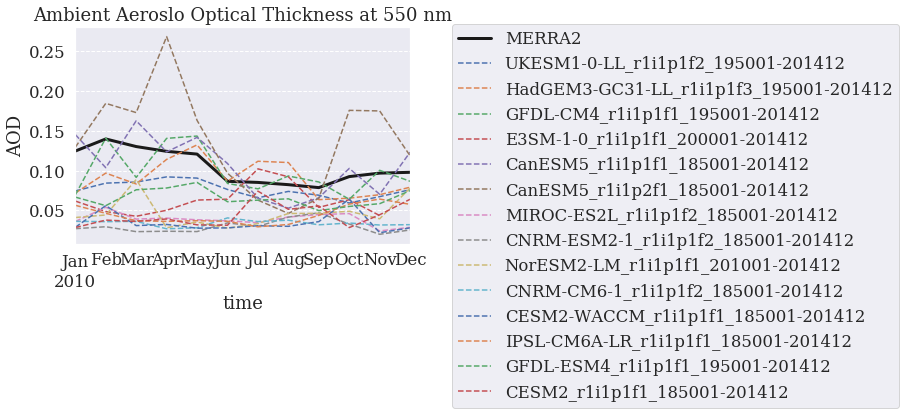

In [12]:
fig, ax = plt.subplots(1, #figsize = [30,13],
                      )
merra['MERRA2'].plot(ax=ax, color = 'k', linewidth=3)
merra[merra.columns[1:]].plot(ax=ax, linestyle = '--')#color = 'gray')

ax.set_ylabel('AOD')
ax.set_title('Ambient Aeroslo Optical Thickness at 550 nm')
ax.legend(bbox_to_anchor=(1.1, 1.05))
